# PerlinNoise 2D

## Resources

https://www.youtube.com/watch?v=y7sgcFhk6ZM&list=PLRqwX-V7Uu6bgPNQAdxQZpJuJCjeOr7VD&index=3

https://www.youtube.com/watch?v=9B89kwHvTN4

https://www.youtube.com/watch?v=MRNFcywkUSA


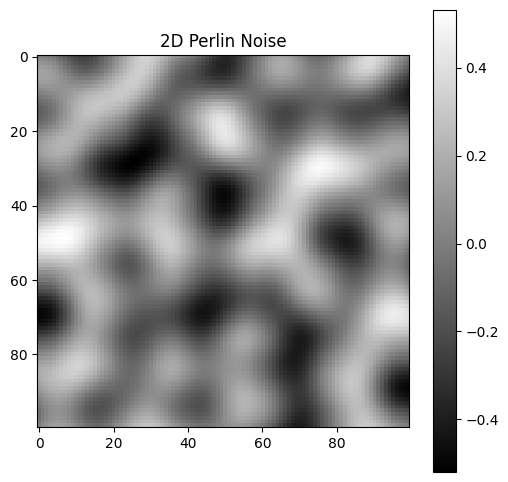

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def fade(t):
    """Smoothstep function for interpolation."""
    return t * t * t * (t * (t * 6 - 15) + 10)

def lerp(a, b, t):
    """Linear interpolation."""
    return a + t * (b - a)

def gradient_noise(grid_size, seed=0):
    """Generates a random 2D grid of gradient vectors."""
    np.random.seed(seed)
    angles = np.random.uniform(0, 2 * np.pi, (grid_size + 1, grid_size + 1))
    return np.stack((np.cos(angles), np.sin(angles)), axis=-1)  # Shape (grid_size+1, grid_size+1, 2)

def perlin2d(x, y, gradients):
    """Computes 2D Perlin noise at given points."""
    grid_size = gradients.shape[0] - 1  # Max index allowed

    # Floor to get integer grid indices
    x0, y0 = np.floor(x).astype(int), np.floor(y).astype(int)
    x1, y1 = x0 + 1, y0 + 1

    # Ensure indices stay within bounds
    x0, x1 = np.clip(x0, 0, grid_size), np.clip(x1, 0, grid_size)
    y0, y1 = np.clip(y0, 0, grid_size), np.clip(y1, 0, grid_size)

    sx, sy = fade(x - x0), fade(y - y0)

    def dot_grid_gradient(ix, iy, x, y):
        """Computes dot product between gradient and distance vector."""
        dx, dy = x - ix, y - iy
        grad = gradients[iy, ix]  # Fetch the gradient vector correctly

        # Ensure gradient indexing is correct
        return dx * grad[..., 0] + dy * grad[..., 1]

    # Compute dot product at each corner
    n00 = dot_grid_gradient(x0, y0, x, y)
    n01 = dot_grid_gradient(x0, y1, x, y)
    n10 = dot_grid_gradient(x1, y0, x, y)
    n11 = dot_grid_gradient(x1, y1, x, y)

    # Linear interpolation
    nx0 = lerp(n00, n10, sx)
    nx1 = lerp(n01, n11, sx)
    return lerp(nx0, nx1, sy)

# Generate Perlin noise map
size = 100
grid_size = 5
grid_x, grid_y = np.meshgrid(np.linspace(0, grid_size, size), np.linspace(0, grid_size, size))
gradients = gradient_noise(grid_size=grid_size, seed=41)  # Fixed gradients for consistency
noise = perlin2d(grid_x, grid_y, gradients)

# Plot Perlin noise
plt.figure(figsize=(6,6))
plt.imshow(noise, cmap='gray')
plt.colorbar()
plt.title("2D Perlin Noise")
plt.show()
